In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [7]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Display the first few rows
df.head()


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [8]:
# Features and labels
X = df['Text']
y = df['language']

# Split into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


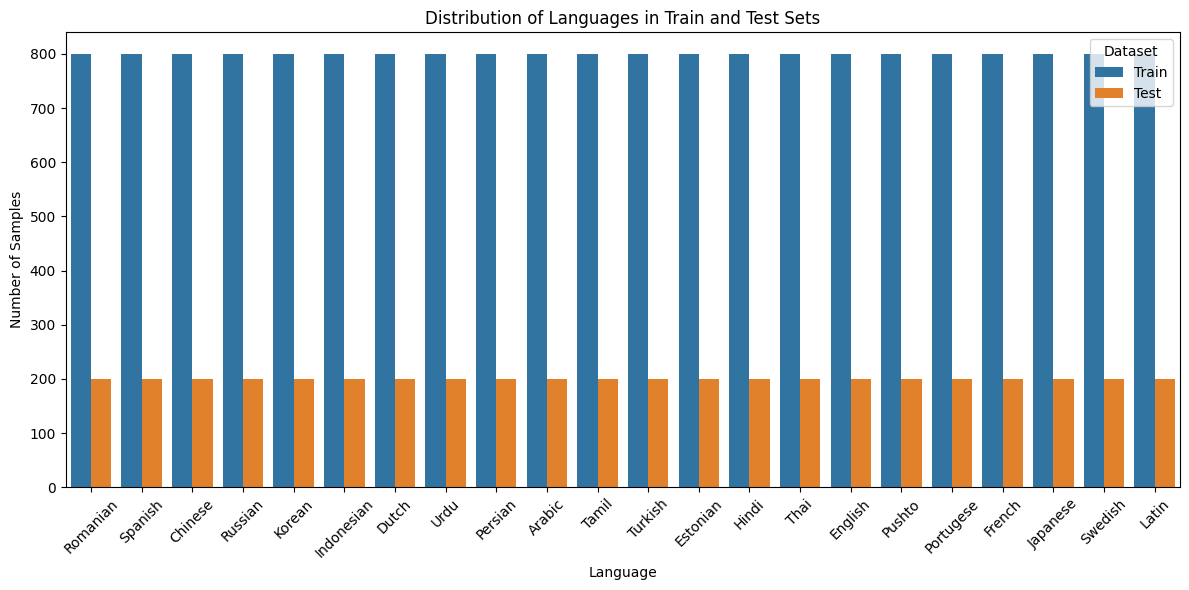

In [9]:
# Create a DataFrame for training data
train_df = pd.DataFrame({'Text': X_train, 'language': y_train, 'Dataset': 'Train'})

# Create a DataFrame for testing data
test_df = pd.DataFrame({'Text': X_test, 'language': y_test, 'Dataset': 'Test'})

# Combine the two DataFrames
combined_df = pd.concat([train_df, test_df])

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=combined_df, x='language', hue='Dataset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Distribution of Languages in Train and Test Sets')
plt.xlabel('Language')
plt.ylabel('Number of Samples')

# Display the plot
plt.tight_layout()
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with character n-grams
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

# Fit and transform the training data, transform the testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'alpha': 0.1}


In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = grid_search.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9797727272727272
Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       200
     Chinese       0.99      0.99      0.99       200
       Dutch       0.97      0.97      0.97       200
     English       0.75      1.00      0.86       200
    Estonian       1.00      0.96      0.98       200
      French       0.96      0.99      0.98       200
       Hindi       1.00      0.96      0.98       200
  Indonesian       1.00      0.97      0.98       200
    Japanese       1.00      0.99      0.99       200
      Korean       1.00      0.99      0.99       200
       Latin       0.98      0.92      0.95       200
     Persian       0.99      0.99      0.99       200
   Portugese       0.98      0.95      0.97       200
      Pushto       1.00      0.95      0.98       200
    Romanian       1.00      0.98      0.99       200
     Russian       0.99      0.99      0.99       200
     Spanish       0.99     

In [13]:
def predict_language(text):
    text_tfidf = vectorizer.transform([text])
    prediction = grid_search.predict(text_tfidf)
    return prediction[0]

# Example usage
print(predict_language("This is a sample sentence."))


English
